this notebook is to show that cropping and whitening are not commutative for 1/f whitening.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
%matplotlib inline
import matplotlib.pyplot as plt
from leelabtoolbox.preprocessing import pipeline
from skimage.data import astronaut
from skimage.color import rgb2gray
import numpy as np
from scipy.stats import pearsonr

In [2]:
astronaut_gray = rgb2gray(astronaut())
print(astronaut_gray.shape)

(512, 512)


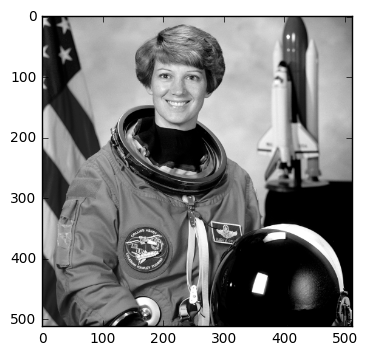

In [3]:
plt.imshow(astronaut_gray, vmin=0, vmax=1, cmap='gray')

doing 1 over f whitening...
doing 1 over f whitening...


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


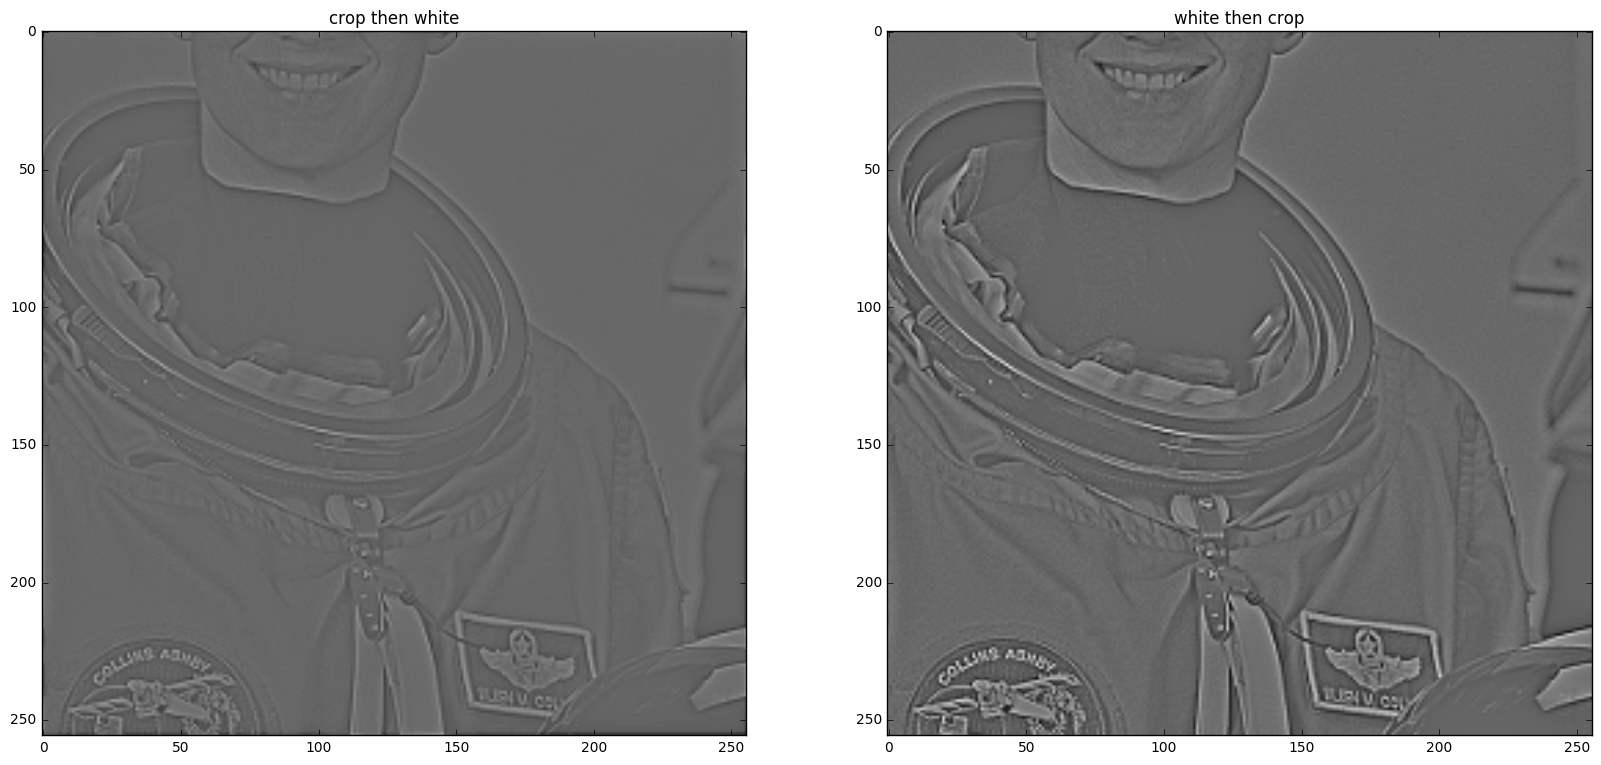

0.927965825939


In [4]:
# this version has no cutoff frequency, and it should make the commutive more likely that without cutoff.

# ok. let's try to crop the central 256x256 portion, using two methods.
crop_slice = slice((256-128),(256+128)), slice((256-128),(256+128))
astronaut_gray_cropped = astronaut_gray[crop_slice].copy()
steps_naive = ['oneOverFWhitening']
pars_naive = {'oneOverFWhitening':
                      {'f_0': None,  # cut off frequency, in cycle / image. 0.4*mean(H, W) by default
                       'central_clip': (None, None),
                       # clip the central central_clip[0] x central_clip[1] part in the frequency
                       # domain. by default, don't do anything.
                       'no_filter': False,  # useful when only want to do central_clip,
                       'cutoff': False,  # whether do cutoff frequency or not.
                       'n_jobs': -1,
                       }
                }
pipeline_default = pipeline.preprocessing_pipeline(steps_naive, pars_naive, order=steps_naive)[0]
white_image_1 = pipeline_default.transform(astronaut_gray_cropped[np.newaxis])[0]
white_image_2 = pipeline_default.transform(astronaut_gray[np.newaxis])[0][crop_slice]

vmin = np.min([white_image_1.min(), white_image_2.min()])
vmax = np.max([white_image_1.max(), white_image_2.max()])

plt.close('all')
fig, axes = plt.subplots(1,2,figsize=(20, 10))
axes[0].imshow(white_image_1, vmin=vmin, vmax=vmax, cmap='gray')
axes[0].set_title('crop then white')
axes[1].imshow(white_image_2, vmin=vmin, vmax=vmax, cmap='gray')
axes[1].set_title('white then crop')
plt.show()
print(pearsonr(white_image_1.ravel(), white_image_2.ravel())[0])
# you can see, the pearsonr is not perfectly correlated, and images are not the same.
# so you cannot relate these two trivially.

doing 1 over f whitening...
doing 1 over f whitening...


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


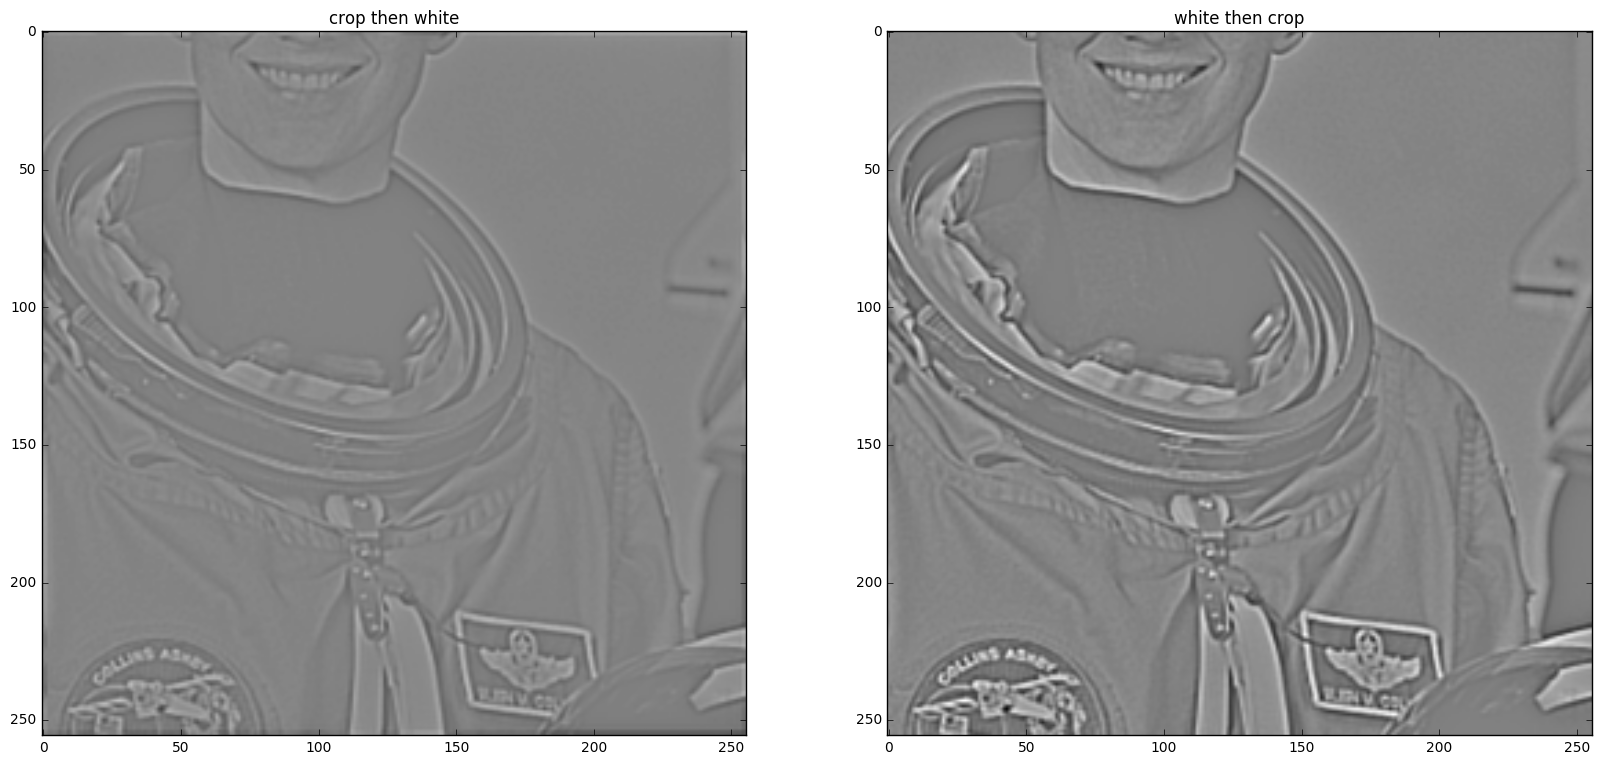

0.940194572971


In [5]:
# ok. let's try to crop the central 256x256 portion, using two methods.
crop_slice = slice((256-128),(256+128)), slice((256-128),(256+128))
astronaut_gray_cropped = astronaut_gray[crop_slice].copy()
steps_naive = ['oneOverFWhitening']
pars_naive = {'oneOverFWhitening':
                      {'f_0': None,  # cut off frequency, in cycle / image. 0.4*mean(H, W) by default
                       'central_clip': (None, None),
                       # clip the central central_clip[0] x central_clip[1] part in the frequency
                       # domain. by default, don't do anything.
                       'no_filter': False,  # useful when only want to do central_clip,
                       'cutoff': True,  # whether do cutoff frequency or not.
                       'n_jobs': -1,
                       }
                }
pipeline_default = pipeline.preprocessing_pipeline(steps_naive, pars_naive, order=steps_naive)[0]
white_image_1 = pipeline_default.transform(astronaut_gray_cropped[np.newaxis])[0]
white_image_2 = pipeline_default.transform(astronaut_gray[np.newaxis])[0][crop_slice]

vmin = np.min([white_image_1.min(), white_image_2.min()])
vmax = np.max([white_image_1.max(), white_image_2.max()])

plt.close('all')
fig, axes = plt.subplots(1,2,figsize=(20, 10))
axes[0].imshow(white_image_1, vmin=vmin, vmax=vmax, cmap='gray')
axes[0].set_title('crop then white')
axes[1].imshow(white_image_2, vmin=vmin, vmax=vmax, cmap='gray')
axes[1].set_title('white then crop')
plt.show()
print(pearsonr(white_image_1.ravel(), white_image_2.ravel())[0])
# you can see, the pearsonr is not perfectly correlated, and images are not the same.
# so you cannot relate these two trivially.